# 散点图

用scatterplot这个点集，鼠标点上去，可以看到这个函数的各个parameter的描述，如下图：
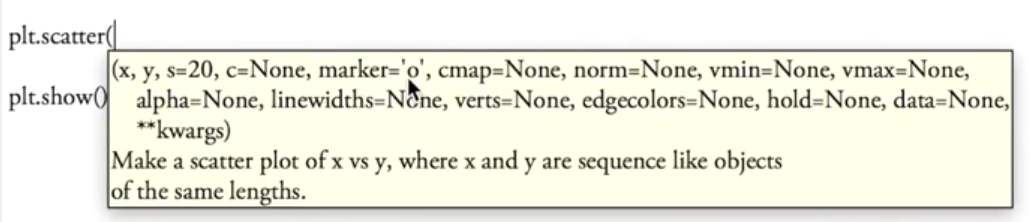

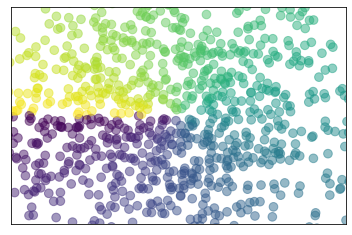

In [30]:
import matplotlib.pyplot as plt
import numpy as np

n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value


# 输入X和Y作为location，size=75，颜色为T，color map用默认值，透明度alpha 为 50%。 
# x轴显示范围定位(-1.5，1.5)，并用xtick()函数来隐藏x坐标轴，y轴同理：

plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()

## Bar 柱状图

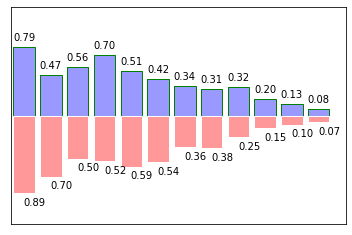

In [55]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1)
plt.bar(X, -Y2)

plt.xlim(-.5, n)     # 调整X范围
plt.xticks(())       # 隐去X坐标
plt.ylim(-1.25, 1.25)# 调整y范围
plt.yticks(())       # 隐去Y坐标


# 用facecolor设置主体颜色，edgecolor设置边框颜色为白色，
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='green')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

# 我们用函数plt.text分别在柱体上方（下方）加上数值，用%.2f保留两位小数，横向居中对齐ha='center'，纵向底部（顶部）对齐va='bottom'：
for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    # x\y后加的小数，是举例
    plt.text(x + 0, y + 0.05, '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x + 0.4, -y - 0.05, '%.2f' % y, ha='center', va='top')
    

plt.show()

## 等高线图


数据集即三维点 (x,y) 和对应的高度值，共有256个点。

高度值使用一个 height function f(x,y) 生成。 

x, y 分别是在区间 [-3,3] 中均匀分布的256个值，并用meshgrid在二维平面中将每一个x和每一个y分别对应起来，编织成栅格:

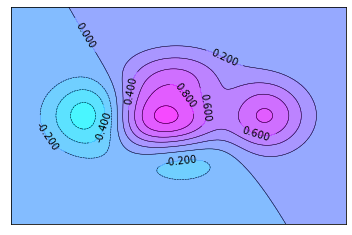

In [97]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    # the height function 高度公式
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
# print(f(X,Y))
X,Y = np.meshgrid(x, y)

# 接下来进行颜色填充。
# 使用函数plt.contourf把颜色加进去，位置参数分别为：X, Y, f(X,Y)。
# 透明度0.75，并将 f(X,Y) 的值对应到color map的暖色组中寻找对应颜色。

# use plt.contourf to filling contours
# X, Y and value for (X,Y) point
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.cool)  #cool这里可以hot

# 接下来进行等高线绘制。使用plt.contour函数划线。位置参数为：X, Y, f(X,Y)。
# 颜色选黑色，线条宽度选0.5。现在的结果如下图所示，只有颜色和线条，还没有数值Label：
# use plt.contour to add contour lines
C = plt.contour(X, Y, f(X, Y), 9, colors='black', linewidths=0.5)

# 添加高度数字
# 8代表等高线的密集程度，这里被分为10个部分。如果是0，则图像被一分为二。
# 最后加入Label，inline控制是否将Label画在线里面，字体大小为10。并将坐标轴隐藏：

plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())

plt.show()

## Image 图片

三行三列的格子，a代表每一个值，图像右边有一个注释，白色代表值最大的地方，颜色越深值越小。

下面我们来看代码：

我们在这个[链接](https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html) 可以看到matplotlib官网上对于内插法的不同方法的描述。下图是一个示例：

kaiser


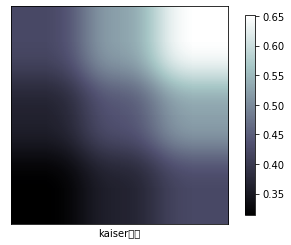

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random

a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)
inter=random.choice([None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
print(inter)
plt.imshow(a, interpolation=inter, cmap='bone', origin='lower')

# 下面我们添加一个colorbar ，其中我们添加一个shrink参数，使colorbar的长度变短为原来的92%：
plt.colorbar(shrink=.92)
plt.xlabel(str(inter)+'方式')
plt.xticks(())
plt.yticks(())
plt.show()

## 3D 图 

首先在进行 3D Plot 时除了导入 matplotlib ，还要额外添加一个模块，即 Axes 3D 3D 坐标轴显示：


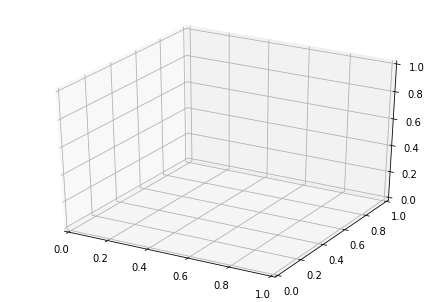

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


之后要先定义一个图像窗口，在窗口上添加3D坐标轴，显示成下图：

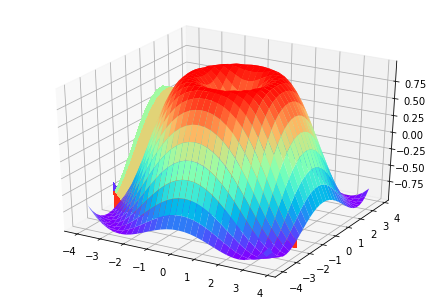

In [133]:
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

ax.contourf(X, Y, Z, zdir='y', offset=-2, cmap=plt.get_cmap('rainbow'))

代码合并

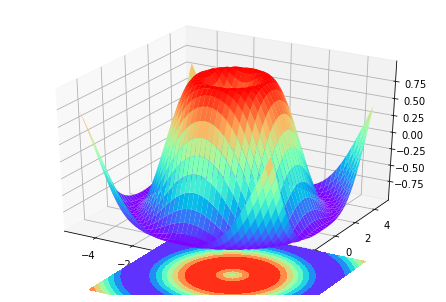

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

# X, Y value
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow')) #offset是投影位置

plt.show()